<a href="https://colab.research.google.com/github/wahyudi0018/PCVK_Ganjil_2024/blob/main/Modul10_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Wahyudi**

**Kelas : TI-3C**

**No. Absen : 26**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Tugas 1: Membuat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170 secara manual

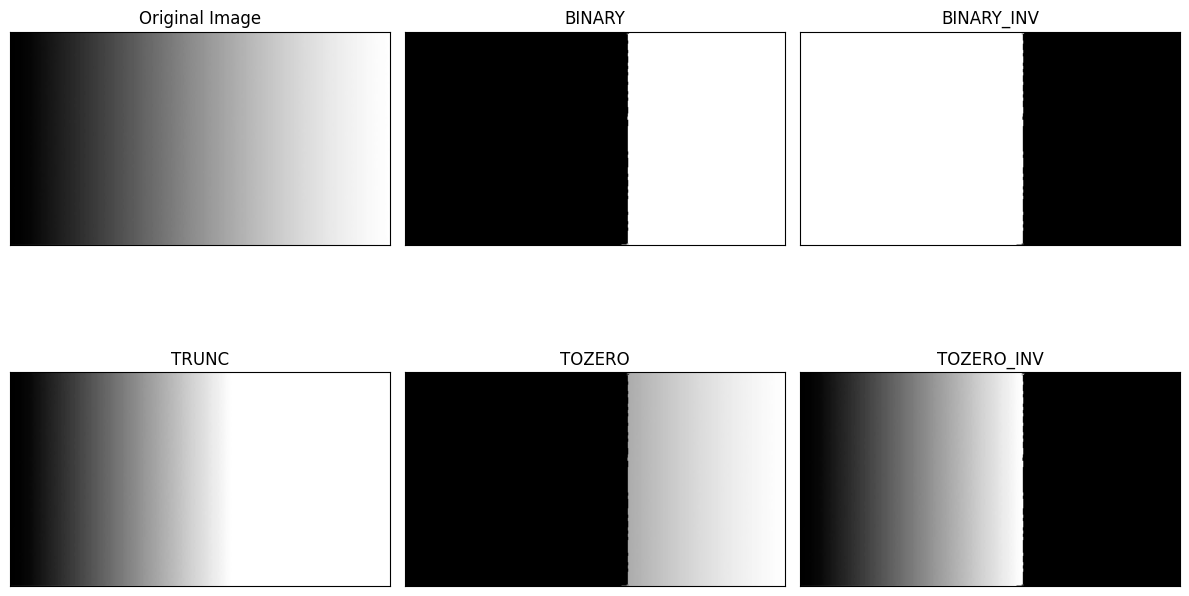

In [ ]:
# Memuat gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/gradient.jpg', cv2.IMREAD_GRAYSCALE)

# Definisikan nilai threshold
nilai_threshold = 170

# Terapkan setiap jenis threshold secara manual
_, binary = cv2.threshold(img, nilai_threshold, 255, cv2.THRESH_BINARY)
_, binary_inv = cv2.threshold(img, nilai_threshold, 255, cv2.THRESH_BINARY_INV)
_, trunc = cv2.threshold(img, nilai_threshold, 255, cv2.THRESH_TRUNC)
_, tozero = cv2.threshold(img, nilai_threshold, 255, cv2.THRESH_TOZERO)
_, tozero_inv = cv2.threshold(img, nilai_threshold, 255, cv2.THRESH_TOZERO_INV)

# Daftar gambar dan judul
gambar = [img, binary, binary_inv, trunc, tozero, tozero_inv]
judul = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

# Fungsi untuk menampilkan gambar
def tampilkan_gambar(gambar, judul, nrows, ncols):
    plt.figure(figsize=(12, 8))
    for i in range(len(gambar)):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(gambar[i], 'gray')
        plt.title(judul[i])
        plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()

# Menampilkan gambar
tampilkan_gambar(gambar, judul, 2, 3)

## Tugas 2: Membuat Otsu Thresholding tanpa menggunakan Library dan Tampilkan juga nilai threshold saat anda gunakan Otsu’s

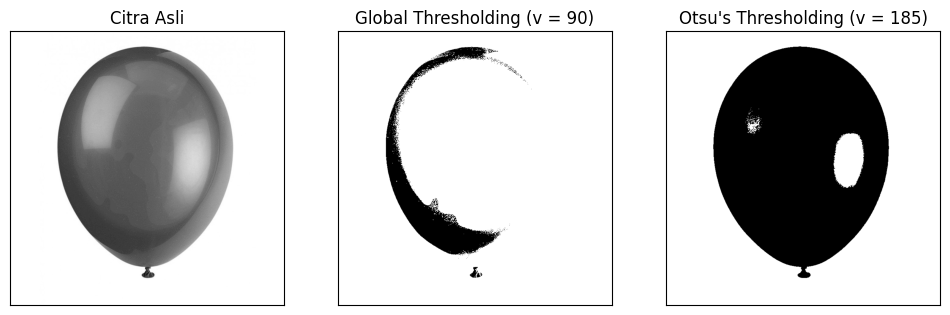

In [ ]:
# Fungsi untuk menghitung Otsu Thresholding manual
def otsu_thresholding(image):
    # Histogram dari gambar
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])
    total = image.shape[0] * image.shape[1]

    current_max, threshold_value = 0, 0
    sum_total = np.dot(np.arange(256), hist)  # Menghitung jumlah total intensitas
    sum_background = 0
    weight_background = 0
    weight_foreground = 0

    for i in range(256):
        weight_background += hist[i]
        if weight_background == 0:
            continue

        weight_foreground = total - weight_background
        if weight_foreground == 0:
            break

        sum_background += i * hist[i]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground

        # Variansi antar kelas
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold_value = i

    return threshold_value

# Load gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# Global Thresholding dengan nilai v = 90
global_threshold_value = 90
_, global_thresh = cv2.threshold(img, global_threshold_value, 255, cv2.THRESH_BINARY)

# Otsu Thresholding
otsu_thresh_value = otsu_thresholding(img)
_, otsu_thresh = cv2.threshold(img, otsu_thresh_value, 255, cv2.THRESH_BINARY)

# Tampilkan hasilnya
titles = ['Citra Asli', f'Global Thresholding (v = {global_threshold_value})', f"Otsu's Thresholding (v = {otsu_thresh_value})"]
images = [img, global_thresh, otsu_thresh]

plt.figure(figsize=(12, 8))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## Tugas 3: Membuat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja

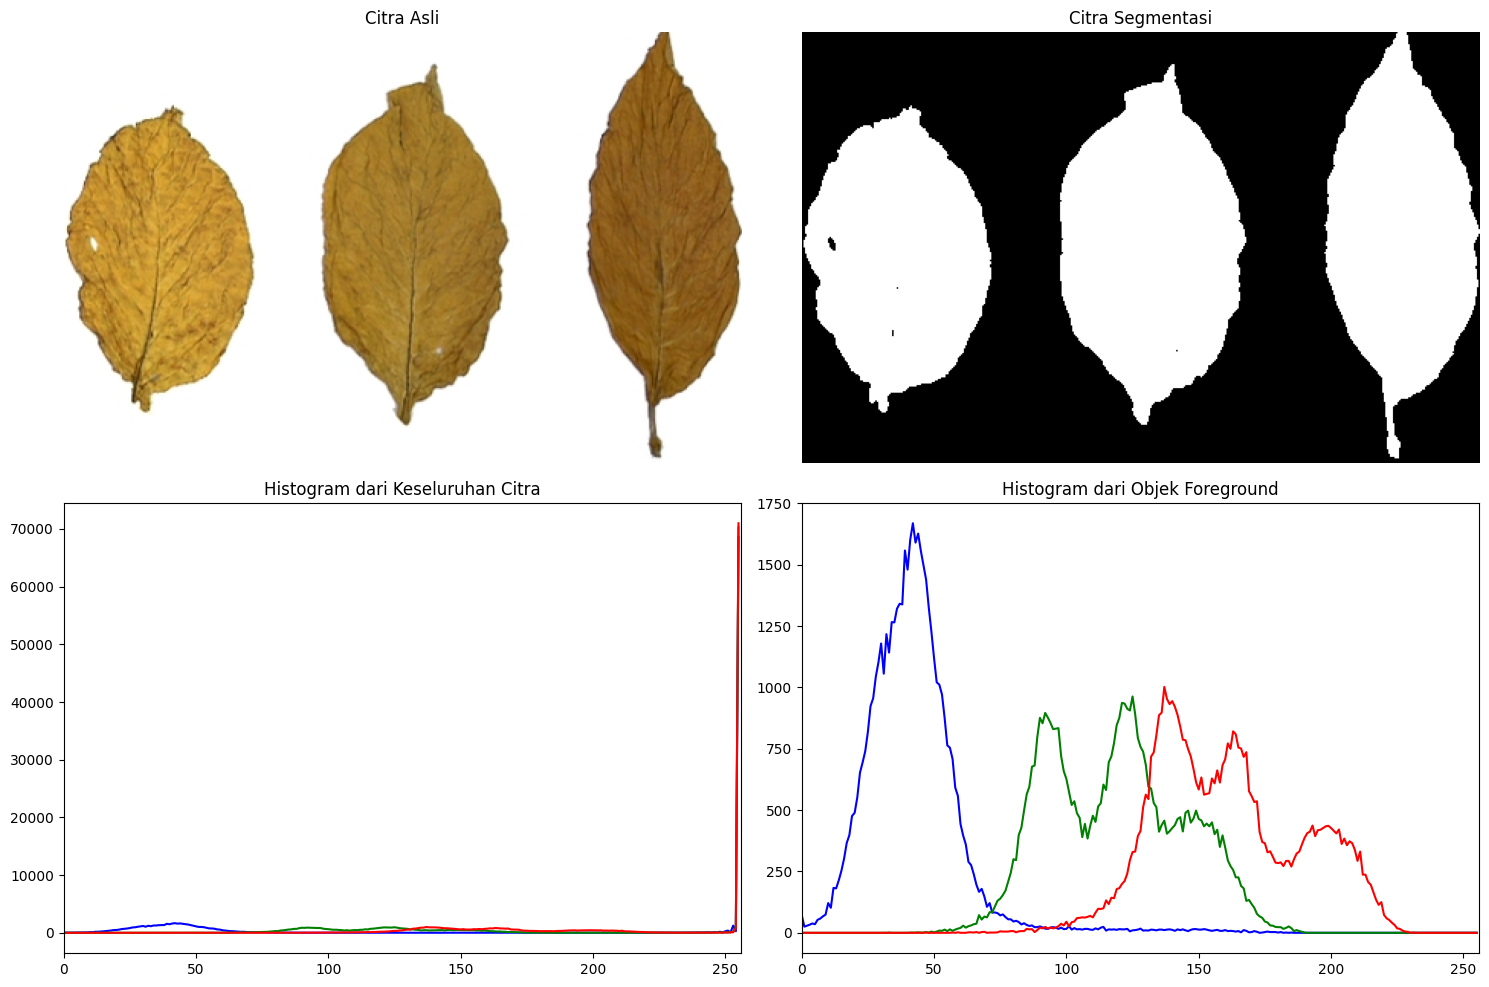

In [8]:
# Memuat gambar
image_tobacco_leaf = cv2.imread('/content/drive/MyDrive/PCVK/Images/tobacco.jpg')

# Mengonversi BGR ke RGB untuk plt.imshow
image_tobacco_leaf_rgb = cv2.cvtColor(image_tobacco_leaf, cv2.COLOR_BGR2RGB)

# Mengonversi ke grayscale
image_tobacco_leaf_gray = cv2.cvtColor(image_tobacco_leaf, cv2.COLOR_BGR2GRAY)

# Menerapkan thresholding Otsu
_, th1 = cv2.threshold(image_tobacco_leaf_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Memisahkan gambar ke dalam saluran warnanya
chans = cv2.split(image_tobacco_leaf)
colors = ('b', 'g', 'r')

# Menampilkan citra asli, citra segmentasi, dan histogram
plt.figure(figsize=(15, 10))

# Subplot untuk citra asli
plt.subplot(2, 2, 1)
plt.imshow(image_tobacco_leaf_rgb)
plt.title('Citra Asli')
plt.axis('off')

# Subplot untuk citra segmentasi
plt.subplot(2, 2, 2)
plt.imshow(th1, cmap='gray')
plt.title('Citra Segmentasi')
plt.axis('off')

# Subplot untuk histogram keseluruhan citra
plt.subplot(2, 2, 3)
for chan, color in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.xlim([0, 256])
plt.title('Histogram dari Keseluruhan Citra')

# Subplot untuk histogram objek foreground
plt.subplot(2, 2, 4)
for chan, color in zip(chans, colors):
    hist_fg = cv2.calcHist([chan], [0], th1, [256], [0, 256])
    plt.plot(hist_fg, color=color)
plt.xlim([0, 256])
plt.title('Histogram dari Objek Foreground')

# Menampilkan semua plot
plt.tight_layout()
plt.show()

## Tugas 4: Lakukan segmentasi warna pada image peppers.jpg, munculkan hanya warna yang kuning saja

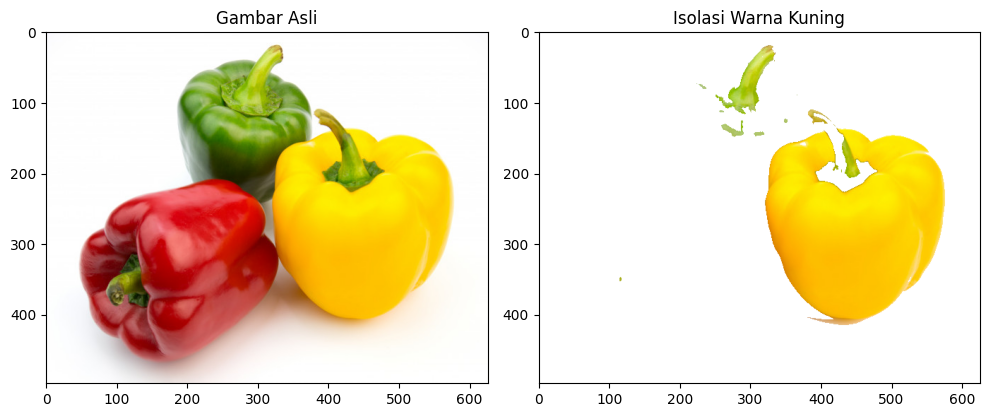

In [ ]:
# Memuat gambar dan menerapkan Gaussian Blur untuk memperhalus clustering warna
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/peppers.jpg')
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Merubah bentuk dan konversi ke float32 untuk K-means
reshaped_blur = blurred_img.reshape((-1, 3)).astype(np.float32)

# Melakukan clustering dengan K-means
K = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(reshaped_blur, K, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

# Memetakan hasil clustering kembali ke bentuk gambar
quantized_img = centers[labels.flatten()].reshape(img.shape).astype(np.uint8)

# Mengkonversi ke HSV untuk memfilter warna dan membuat mask biner untuk warna kuning
quantized_hsv = cv2.cvtColor(quantized_img, cv2.COLOR_BGR2HSV)
mask_yellow = cv2.inRange(quantized_hsv, (0, 180, 180), (50, 255, 255))

# Membalik mask dan mengganti area non-kuning pada gambar asli menjadi putih
inverse_mask = cv2.bitwise_not(mask_yellow)
isolated_result = img.copy()
isolated_result[inverse_mask == 255] = [255, 255, 255]

# Menampilkan gambar asli dan hasil isolasi warna kuning secara berdampingan
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(isolated_result, cv2.COLOR_BGR2RGB))
plt.title("Isolasi Warna Kuning")

plt.tight_layout()
plt.show()

Kendala dalam menampilkan warna tertentu adalah menentukan rentang warna yang tepat, karena perbedaan intensitas cahaya dan kemiripan warna lain. Variasi pencahayaan dan format warna seperti BGR atau HSV membuat batas rentang harus akurat agar hasil isolasi warna sesuai.

## Tugas 5: Lakukan thresholding biner dengan hasil terbaik menurut anda

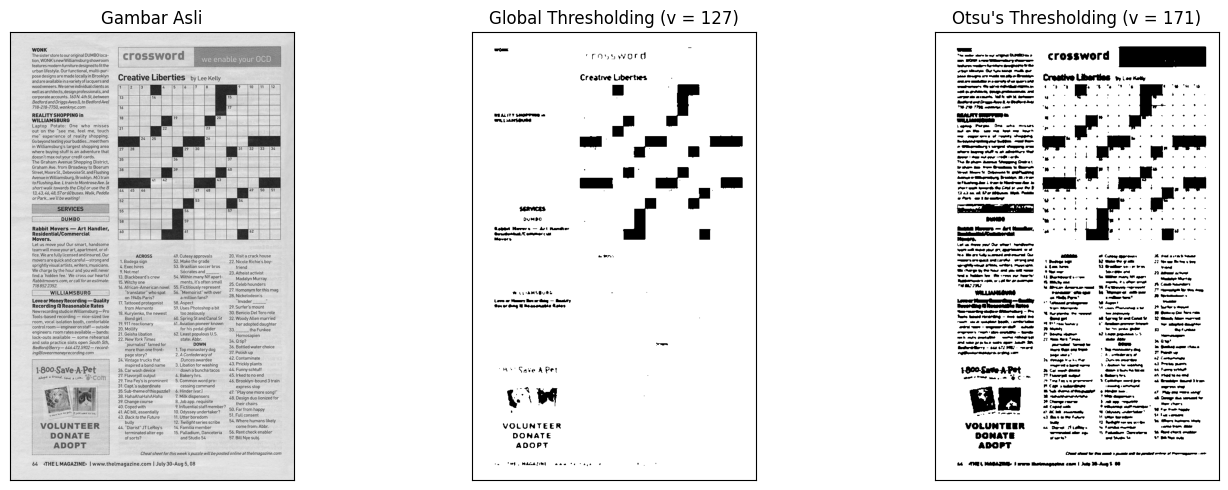

In [11]:
# Membaca gambar dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/crossword.jpg', 0)

# Menggunakan Gaussian Blur untuk mengurangi noise
blur = cv2.GaussianBlur(img, (5, 5), 0)

# Thresholding Biner Global dengan nilai threshold tetap
thresh_value = 127
_, th1 = cv2.threshold(blur, thresh_value, 255, cv2.THRESH_BINARY)

# Otsu's Thresholding untuk nilai threshold otomatis
otsu_value, th2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menyiapkan judul dan gambar untuk ditampilkan
titles = ['Gambar Asli', 'Global Thresholding (v = 127)', f"Otsu's Thresholding (v = {int(otsu_value)})"]
images = [img, th1, th2]

# Menampilkan gambar asli, hasil thresholding global, dan Otsu's thresholding
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()